## matplotlibを活用した可視化方法を整理
* オブジェクト指向で実装してみた
参考記事：[URL](https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9)

In [1]:
# ライブラリーのインストール
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler

from pandas.plotting import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns

import os

#### データの読み込み

In [2]:
file_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
file_name = os.path.splitext(os.path.basename(file_path))[0]
column_names = ['MPG','Cylinders', 'Displacement', 'Horsepower', 'Weight',
                  'Acceleration', 'Model Year', 'Origin']

In [3]:
df = pd.read_csv(
    file_path, # ファイルパス
    names = column_names, # 列名を指定
    na_values ='?', # ?は欠損値として読み込む
    comment = '\t', # TAB以降右はスキップ 
    sep = ' ', # 空白行を区切りとする
    skipinitialspace = True, # カンマの後の空白をスキップ
    encoding = 'utf-8'
) 
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### 棒グラフ

In [4]:
df_year = df.groupby(['Model Year'])['Displacement'].sum().reset_index()
df_year['Displacement'] = df_year['Displacement']
df_year.head()

,Model Year,Displacement
0,70,8161.0
1,71,5873.0
2,72,6114.5
3,73,10275.0
4,74,4637.0


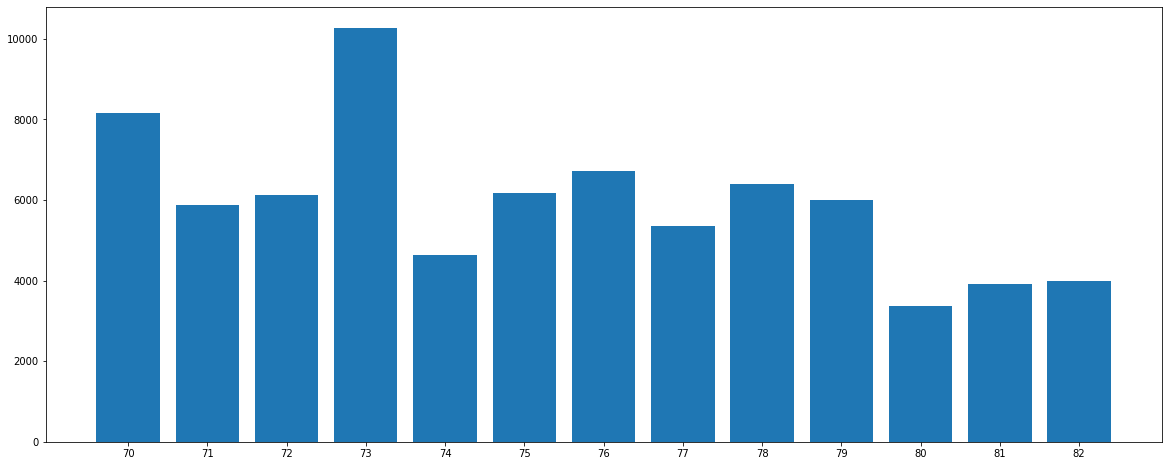

In [5]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year['Model Year'])
ax.bar(df_year['Model Year'], df_year['Displacement'])
plt.show()

#### 軸に名前を付ける

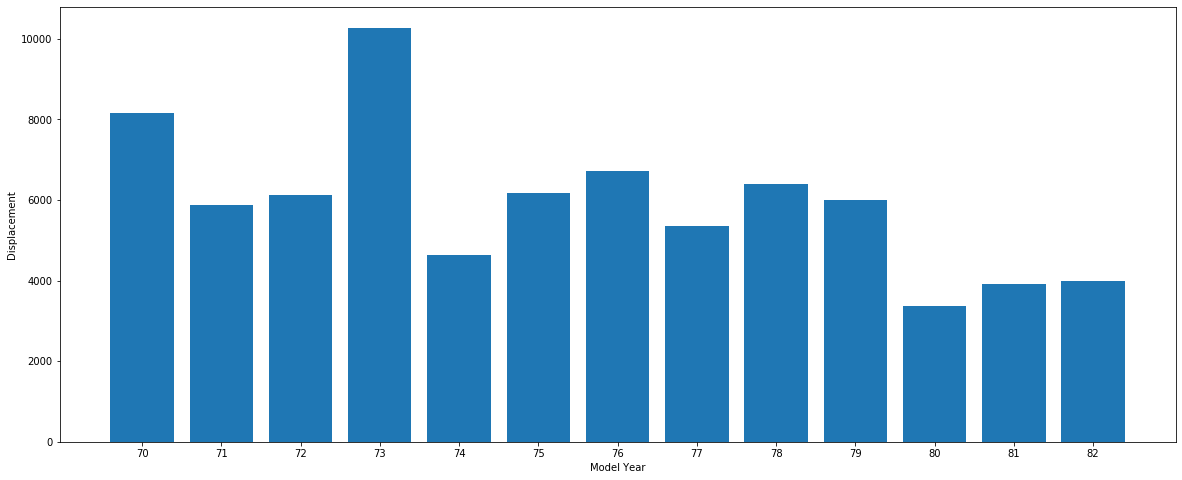

In [6]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xlabel='Model Year', ylabel='Displacement',
                     xticks=df_year['Model Year'])
ax.bar(df_year['Model Year'], df_year['Displacement'])

# set_xlabel, set_ylabelで設定してもOK
# ax.set_xlabel('Model Year', fontproperties=font, fontsize=20)
# ax.set_ylabel('Displacement', fontproperties=font, fontsize=20)
plt.show()

#### 軸の文字を大きくする

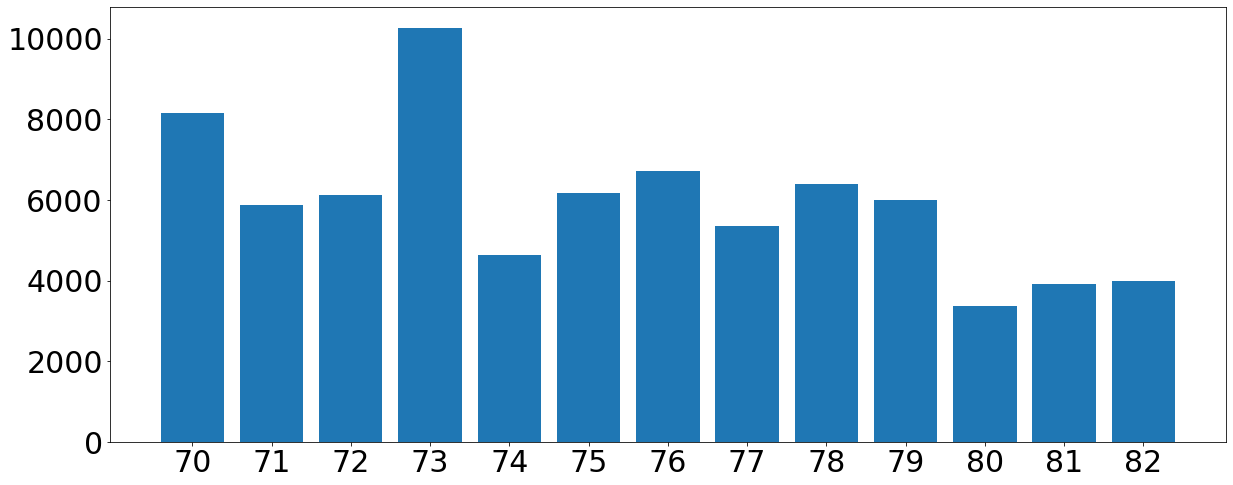

In [7]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year['Model Year'])
ax.bar(df_year['Model Year'], df_year['Displacement'])

# tick_paramsで設定
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

#### 軸の色を変える

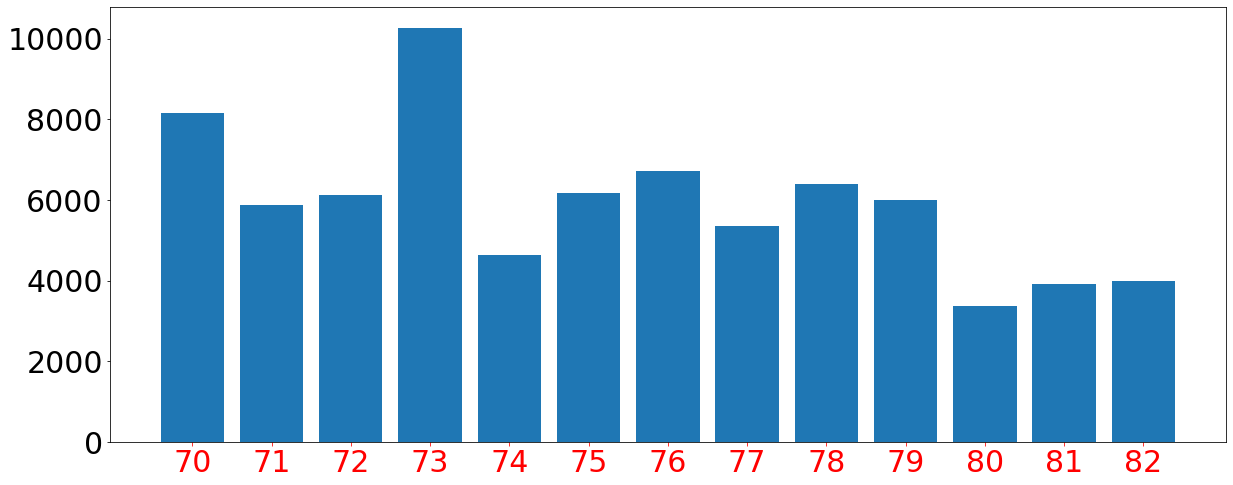

In [8]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year['Model Year'])
ax.bar(df_year['Model Year'], df_year['Displacement'])

# tick_paramsで設定
ax.tick_params(axis='x', labelsize=30, colors = 'red')
ax.tick_params(axis='y', labelsize=30)
ax.ticklabel_format(axis='y', style='plain')
plt.show()

#### 棒グラフの上に数字を追加

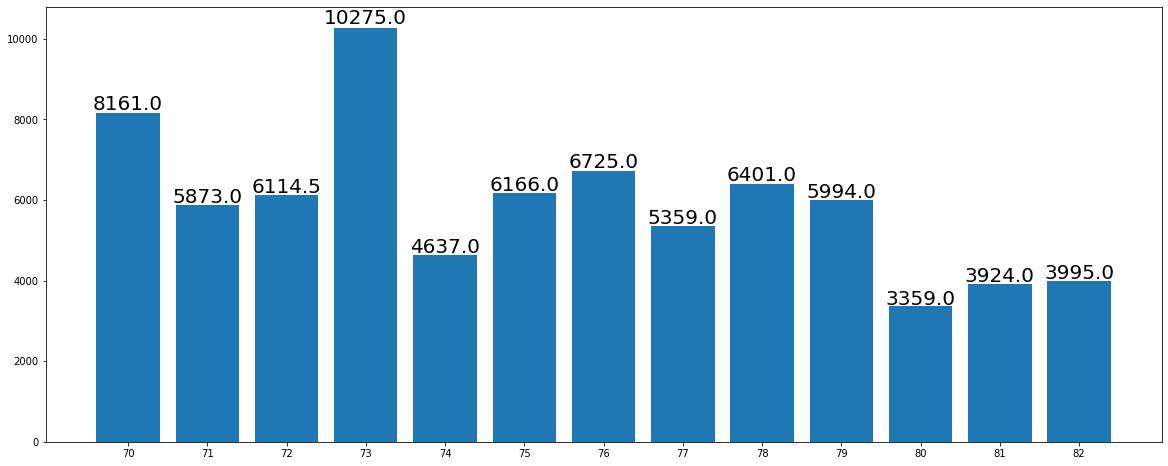

In [9]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, xticks=df_year['Model Year'])
ax.bar(df_year['Model Year'], df_year['Displacement'])

# 棒グラフの上に数字を追加
for i in range(len(df_year)):
    ax.text(
        x=df_year['Model Year'][i],
        y=df_year['Displacement'][i] + (df_year['Displacement'][i]) / 100,
        s=df_year['Displacement'][i],
        horizontalalignment='center',
        size=20)
plt.show()

#### ヒストグラム

#### matplotlib

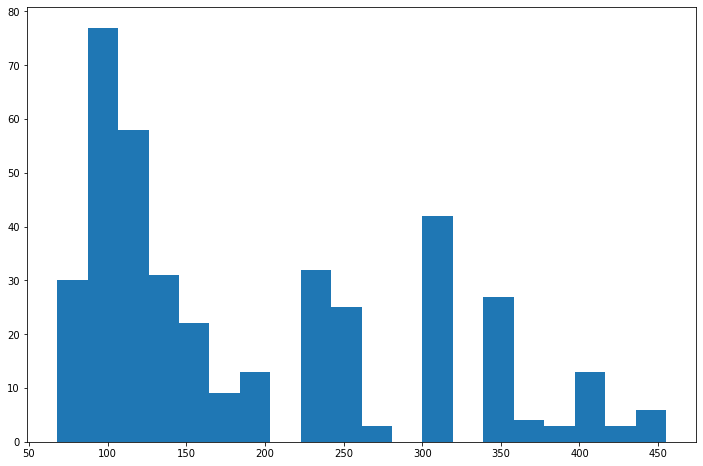

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['Displacement'],  bins=20)
plt.show()

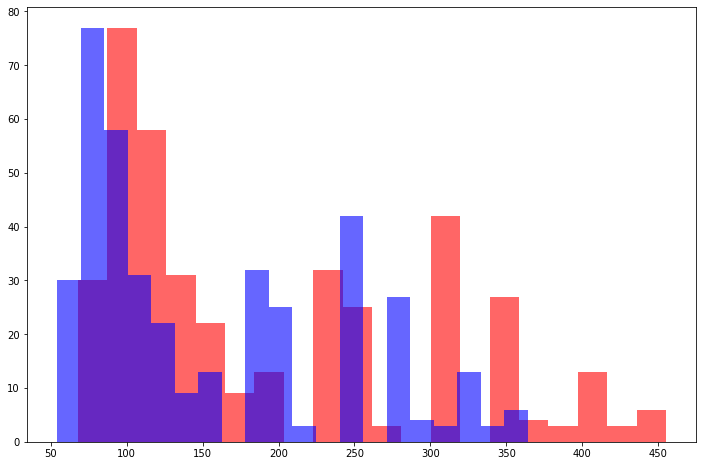

In [11]:
# 複数ヒストグラムを重ねる
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['Displacement'],  bins=20, color='r', alpha=0.6)
ax.hist(df['Displacement']*0.8,  bins=20, color='b', alpha=0.6)
plt.show()

#### seaborn

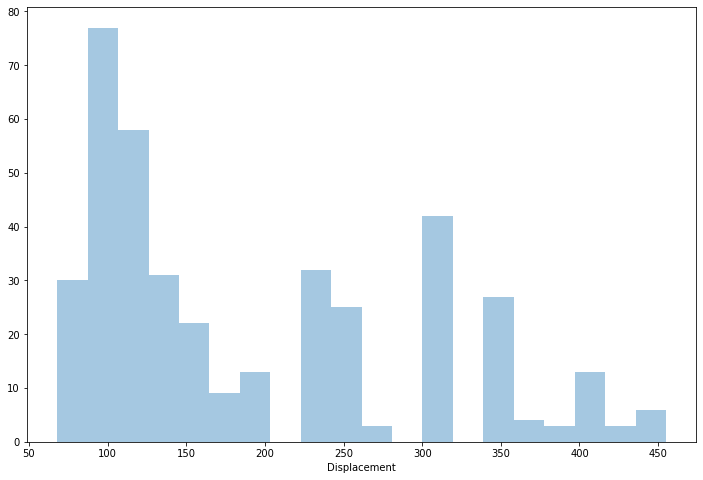

In [12]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax = sns.distplot(df['Displacement'], bins=20, kde=False)